# UECE - Universidade Estadual do Ceará
## Programa de Pós-graduação em Ciência da Computação
## Fundamentos de Análise de Dados - 2021-1

# Classificação de imagens 
   ###  Domingos Bruno Sousa Santos
 * Apresentação parcial 
 * Projeções Ortogonais
 
### *Sign Language MNIST* - reconhecimento de linguagem americana de sinais:
* 27455 (79.3%) imagens de treinamento;
* 7172 (20.7%) imagens de teste;
* imagens com 28 × 28 pixels;
* 24 letras (excluídos o J e o Z) (classes).

<img src="img_sing.png">

In [1]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Leitura dos dados .CSV
df_train = pd.read_csv("sign_mnist_train/sign_mnist_train.csv")
df_test = pd.read_csv("sign_mnist_test/sign_mnist_test.csv")
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
# Pegando as classes das imagens de treino e teste
train_label = df_train["label"].values
test_label = df_test["label"].values

# Removendo a coluna das classes do data frame
del df_train["label"]
del df_test["label"]

# Juntando os dados de teste de treinamneto
X_data = np.concatenate((df_train.values, df_test.values), axis=0)
Y_data = np.concatenate((train_label, test_label), axis=0)

In [4]:
# 28x28
print(X_data.shape)
np.unique(Y_data)

(34627, 784)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

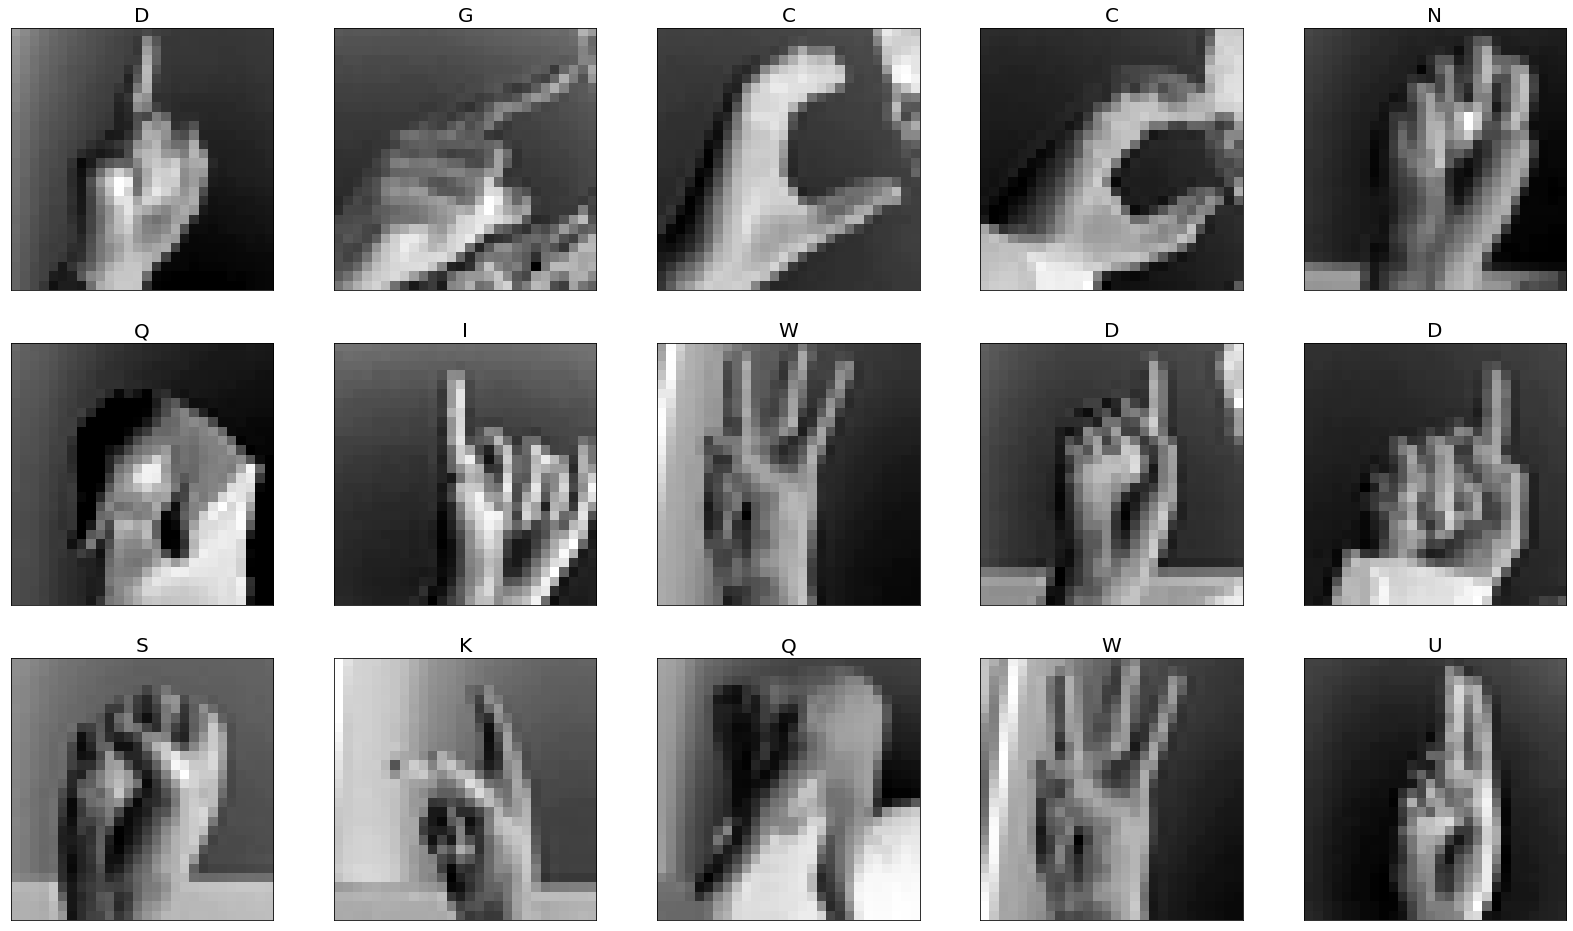

In [27]:
# Platar algumas imagens do dataset
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 
               'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]
plt.figure(figsize=(28,28))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    img = X_data[i].reshape(28, 28)
    plt.imshow(img, cmap=plt.cm.binary)
    label_index = int(Y_data[i])
    plt.title(class_names[label_index], fontsize=20)
plt.show()

# 

## 1. Centralizar a matriz de dados original $\tilde{X}$ obtendo a matriz $X$.
Centralizar a matriz de dados original obtendo a matriz X.
A centralização de dados caracteriza-se pela subtração dos dados amostrais de cada variável, da sua média amostral.
\begin{equation}
X = \tilde{X} - \mu 
\end{equation}

In [6]:
# Centralizando a matriz de dados
mean_x = np.mean(X_data, axis=0)
X_central = X_data - mean_x
X_central

array([[-38.85707685, -30.90322581, -24.67782366, ...,  42.92286366,
         42.78869091,  43.22081035],
       [  9.14292315,   8.09677419,   4.32217634, ..., -58.07713634,
        -25.21130909,  -9.77918965],
       [ 41.14292315,  39.09677419,  36.32217634, ...,  33.92286366,
         33.78869091,  36.22081035],
       ...,
       [ 44.14292315,  42.09677419,  38.32217634, ...,  49.92286366,
         48.78869091,  49.22081035],
       [ 55.14292315,  56.09677419,  56.32217634, ..., -94.07713634,
        -90.21130909, -95.77918965],
       [ 27.14292315,  25.09677419,  21.32217634, ...,  33.92286366,
         32.78869091,  33.22081035]])

## 2. Dividir o banco de dados em conjunto de treinamento e conjunto de teste (proporções comumente utilizadas são 60%/40% e 70%/30%.)



In [7]:
# Dividindo os dados com o X normal
X_train, X_test, Y_train, Y_test = train_test_split (X_data, Y_data, 
                                                                     test_size=0.3, 
                                                                     random_state = 0)
# Dividindo os dados com o X centralizado 
X_train_cent, X_test_cent, Y_train_cent, Y_test_cent = train_test_split (X_central, Y_data, 
                                                                     test_size=0.3, 
                                                                     random_state = 0)

In [8]:
print(X_train.shape)
print(X_train_cent.shape)

(24238, 784)
(24238, 784)


In [9]:
X_train[0][:30]

array([220, 222, 224, 224, 225, 226, 227, 228, 228, 228, 227, 228, 229,
       229, 228, 229, 229, 228, 228, 228, 227, 228, 227, 225, 223, 222,
       221, 220, 221, 223])

In [10]:
X_train_cent[0][:30]

array([74.14292315, 73.09677419, 72.32217634, 70.01501718, 68.38340024,
       67.09587894, 66.15282872, 65.38908944, 63.70661622, 62.09813152,
       59.90342796, 59.83102781, 60.12527796, 59.34270945, 57.63791261,
       58.10725734, 57.80541196, 56.67687065, 56.72463684, 57.01908915,
       56.4524504 , 58.01195599, 57.9609842 , 57.12100384, 56.28769457,
       57.51202819, 58.19712941, 57.68648742, 73.40734109, 72.30952725])


## 3. Calcular a matriz de covariância dos dados treinamento de duas maneiras:
   
* 1) Utilizado base de treinamento original $\tilde{X}$ (não centralizada):
\begin{align} np.cov(X) \end{align}
* 2) Utilizando base de treinamento centralizada $X$:
\begin{equation}
 \frac{1}{m-1}X^TX
\end{equation}

Comparar os resultados. Atenção: verique se o parâmetro $rowvar$ na
função np.cov() deve ser $True$ ou $False$.

In [11]:
# Calculando a matriz de covariância com a primeira forma com X Não cetralizado
cov_mat_X_normal = np.cov(X_train, rowvar=False)
print(cov_mat_X_normal.shape)
cov_mat_X_normal

(784, 784)


array([[1758.84240595, 1663.11672143, 1598.12326788, ...,  571.88417094,
         494.90122972,  471.05427825],
       [1663.11672143, 1628.32121452, 1560.76925607, ...,  562.13017486,
         491.25674584,  462.9857588 ],
       [1598.12326788, 1560.76925607, 1550.71494166, ...,  525.42630113,
         457.08547669,  437.84991878],
       ...,
       [ 571.88417094,  562.13017486,  525.42630113, ..., 4133.63083713,
        4008.23019838, 3837.78402238],
       [ 494.90122972,  491.25674584,  457.08547669, ..., 4008.23019838,
        4200.17151118, 4098.63249   ],
       [ 471.05427825,  462.9857588 ,  437.84991878, ..., 3837.78402238,
        4098.63249   , 4310.49597647]])

In [12]:
m = X_train_cent.shape[0] # Pegando o numero de linhas
# Aplicando a formula do método da segunda forma
cov_mat_X_cent = (1/(m-1)) * np.dot(X_train_cent.T, X_train_cent)
print(cov_mat_X_cent.shape)
cov_mat_X_cent 

(784, 784)


array([[1758.85714787, 1663.12183801, 1598.13083259, ...,  571.91156573,
         494.92711206,  471.0931415 ],
       [1663.12183801, 1628.32299036, 1560.77188161, ...,  562.13968295,
         491.26572899,  462.99924733],
       [1598.13083259, 1560.77188161, 1550.71882343, ...,  525.44035855,
         457.09875801,  437.86986115],
       ...,
       [ 571.91156573,  562.13968295,  525.44035855, ..., 4133.6817446 ,
        4008.27829527, 3837.85624158],
       [ 494.92711206,  491.26572899,  457.09875801, ..., 4008.27829527,
        4200.21695266, 4098.700722  ],
       [ 471.0931415 ,  462.99924733,  437.86986115, ..., 3837.85624158,
        4098.700722  , 4310.59842926]])

In [13]:
# Comparando valores por valores
cov_mat_X_cent.astype("int") == cov_mat_X_normal.astype("int")

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [14]:
#Comparando uma matriz pela a outra
np.array_equal(cov_mat_X_cent.astype("int"), cov_mat_X_normal.astype("int"))

False

## 4. Calcular a decomposição espectral da matriz de covariância dos dados de treinamento, isto é, $cov(X) = QΛQ^T$, usando a função do NumPy:

\begin{equation}
 cov(X) = QΛQ^T
\end{equation}

\begin{equation}
 w, Q =  np.linalg.eigh(cov(X))
\end{equation}

* $w$ trata-se dos autovalores
* $Q$ trata-se dos autovetores

obtendo-se os autovalores w e seus autovetores associados nas colunas de Q.
Atenção: os autovalores (e seus autovetores associados) devem ser ordenados em ordem decrescente.

In [15]:
w, Q = np.linalg.eigh(cov_mat_X_cent)
print(w[:30])
Q[:30]

[0.14745258 0.16958537 0.17422916 0.18930397 0.21310705 0.22944502
 0.2466118  0.27526125 0.29727973 0.31067351 0.32176178 0.34307929
 0.35897833 0.39116202 0.43176493 0.44975302 0.47318182 0.48217013
 0.504211   0.52751498 0.58300126 0.60488839 0.63253241 0.64773803
 0.66821979 0.68705676 0.72971757 0.75450597 0.77141278 0.83935049]


array([[-1.74662601e-01,  2.04804774e-01, -2.27620336e-02, ...,
        -5.69028347e-02,  1.97453913e-03, -4.32044638e-02],
       [ 3.20195782e-01,  9.22117072e-03,  1.44834095e-01, ...,
        -5.34868140e-02,  8.34214086e-04, -4.27970684e-02],
       [-2.13304970e-01, -1.50004618e-01,  1.05105149e-01, ...,
        -5.19355120e-02, -1.47820811e-03, -4.28215949e-02],
       ...,
       [ 6.78827468e-04, -1.40936454e-04, -2.20604967e-03, ...,
         2.01134618e-02, -1.42838549e-02, -1.86363450e-02],
       [ 3.01351803e-01, -3.68300668e-01,  3.30424364e-02, ...,
        -5.75666290e-02,  1.86253130e-03, -4.35284625e-02],
       [-5.02723713e-01,  4.03352364e-02, -3.11224325e-01, ...,
        -5.40421878e-02,  6.39648536e-04, -4.30531663e-02]])

In [16]:
# Ordenando os autovalores de forma decrescentes
index = np.argsort(w)[::-1] #Obter índices para ordenação decrescente dos autovalores
w_dec = w[index]
w_dec[:30]

array([537091.57034948, 167243.127581  , 131806.49360588,  89385.80370487,
        55831.77293111,  53597.22460341,  47562.02333092,  39225.10263378,
        37751.74654727,  30333.84345983,  27550.24612598,  24837.14621824,
        21505.03598043,  20458.51332271,  16684.46006507,  15183.20045127,
        12935.41455703,  12541.26432225,  11372.45421748,  10525.51204508,
         9784.02814712,   9175.13699616,   8350.87499621,   7982.44177133,
         7816.07466523,   7138.96828496,   6817.79486646,   6291.7949705 ,
         5943.65967111,   5910.06088715])

In [17]:
# Ordenando os autovetores de forma decrescentes
Q_dec = Q[index]
Q_dec[:30]

array([[-0.00016559, -0.00222029, -0.00078143, ...,  0.0385044 ,
         0.09539855, -0.03032871],
       [-0.0015359 ,  0.00445228,  0.00325329, ...,  0.03659848,
         0.09762979, -0.03131344],
       [ 0.00112941, -0.00251503, -0.00231183, ...,  0.03306994,
         0.10070846, -0.03287309],
       ...,
       [ 0.00063638,  0.00251691,  0.00024351, ..., -0.03274027,
         0.02149068, -0.03616029],
       [ 0.00185151, -0.00121611, -0.00234958, ...,  0.0366169 ,
         0.09877244, -0.03294105],
       [-0.00120563, -0.00367927,  0.00049745, ...,  0.03395088,
         0.10131545, -0.03445634]])